# Data Analysis of Dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
# read in the csv belonging to the images
df = pd.read_csv(r'D:\Thesis\Dataset\varetinadisease\train.csv')   
#In python '\' have meaning in python. Try instead do string like this r"path": This tells python not to process the backslash character / as it usually does and read the whole string as-is.

df.head(10)

,filename,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal
0,c24a1b14d253.jpg,0,0,0,0,0,1,0
1,9ee905a41651.jpg,0,0,0,0,0,1,0
2,3f58d128caf6.jpg,0,0,1,0,0,0,0
3,4ce6599e7b20.jpg,1,0,0,0,1,0,0
4,0def470360e4.jpg,1,0,0,0,1,0,0
5,e80c3ba691f9.jpg,1,0,0,1,0,1,0
6,37b8fa3b6dce.jpg,1,0,0,1,0,1,0
7,b5740f9b3508.jpg,1,0,0,1,0,1,0
8,d7596283f399.jpg,1,0,0,1,0,1,0
9,1083d0bd0ff8.jpg,1,0,0,1,0,1,0


In [30]:
# Size of the DataFrame in (Row X Col) format.

df.shape

#checked in the train folder where all the 3435 images are existed

(3435, 8)

In [31]:
# Checking the variables types so that if we need to convert the type we can easily convert
df.dtypes

filename                      object
opacity                        int64
diabetic retinopathy           int64
glaucoma                       int64
macular edema                  int64
macular degeneration           int64
retinal vascular occlusion     int64
normal                         int64
dtype: object

In [32]:
# To know about the quantity of the disease which will indicate the dataset is balanced or not
for i in df.columns[1:]:
    print(i, df[i].sum())

opacity 1533
diabetic retinopathy 755
glaucoma 597
macular edema 516
macular degeneration 574
retinal vascular occlusion 440
normal 525


The dataset is imbalanced we can see from upper result

In [33]:
# make a new columns with all labels
df['labels'] = df.eq(1).apply(lambda x: ', '.join(x[x].index), axis = 1)

In [34]:
df.head()

,filename,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal,labels
0,c24a1b14d253.jpg,0,0,0,0,0,1,0,retinal vascular occlusion
1,9ee905a41651.jpg,0,0,0,0,0,1,0,retinal vascular occlusion
2,3f58d128caf6.jpg,0,0,1,0,0,0,0,glaucoma
3,4ce6599e7b20.jpg,1,0,0,0,1,0,0,"opacity, macular degeneration"
4,0def470360e4.jpg,1,0,0,0,1,0,0,"opacity, macular degeneration"


In [35]:
# Illnesses, that occur together
df.labels.value_counts()

opacity                                                                     671
normal                                                                      525
glaucoma                                                                    327
macular degeneration                                                        299
opacity, macular degeneration                                               212
diabetic retinopathy                                                        212
opacity, diabetic retinopathy                                               186
retinal vascular occlusion                                                  170
diabetic retinopathy, macular edema                                         162
opacity, diabetic retinopathy, macular edema                                154
opacity, glaucoma                                                           140
macular edema, retinal vascular occlusion                                    74
opacity, macular edema, retinal vascular

### Abnormality Checking

In [36]:
#Now Starting to check that how many patients has one,two,three........ abronamilitys/normalities
#First let's check how many patients has only one abnormalities+normalities
df[(df.sum(axis=1)==1)].labels.value_counts().sum()

2231

Here among 3435 retinas there are 2231 retinas which has one label only. Futhermore, among them normal retina counts 525 (we can see from upper). So then counts of single abnormality is (2231-525) = 1706 amounts of single abnormility.

In [37]:
#Now, let's check how many patients has two abnormalities
df[(df.sum(axis=1)==2)].labels.value_counts().sum()

916

916 rentinas have two abnormilities.

In [38]:
#Now, let's check how many patients has three abnormalities
df[(df.sum(axis=1)==3)].labels.value_counts().sum()

275

275 rentinas have three abnormilities.

In [39]:
#Now, let's check how many patients has four abnormalities
df[(df.sum(axis=1)==4)].labels.value_counts().sum()

13

13 rentinas have four abnormilities.

In [40]:
#Now, let's check how many patients has five abnormalities
df[(df.sum(axis=1)==5)].labels.value_counts().sum()

0

0 rentina has five abnormilities which proves there is not more than four abnormailities

In [41]:
# Correlation
df.corr().abs().unstack().sort_values(ascending=False)

opacity                     opacity                       1.000000
diabetic retinopathy        diabetic retinopathy          1.000000
retinal vascular occlusion  retinal vascular occlusion    1.000000
macular degeneration        macular degeneration          1.000000
glaucoma                    glaucoma                      1.000000
macular edema               macular edema                 1.000000
normal                      normal                        1.000000
diabetic retinopathy        macular edema                 0.418289
macular edema               diabetic retinopathy          0.418289
normal                      opacity                       0.381328
opacity                     normal                        0.381328
macular edema               retinal vascular occlusion    0.233828
retinal vascular occlusion  macular edema                 0.233828
diabetic retinopathy        normal                        0.225444
normal                      diabetic retinopathy          0.22

<AxesSubplot:>

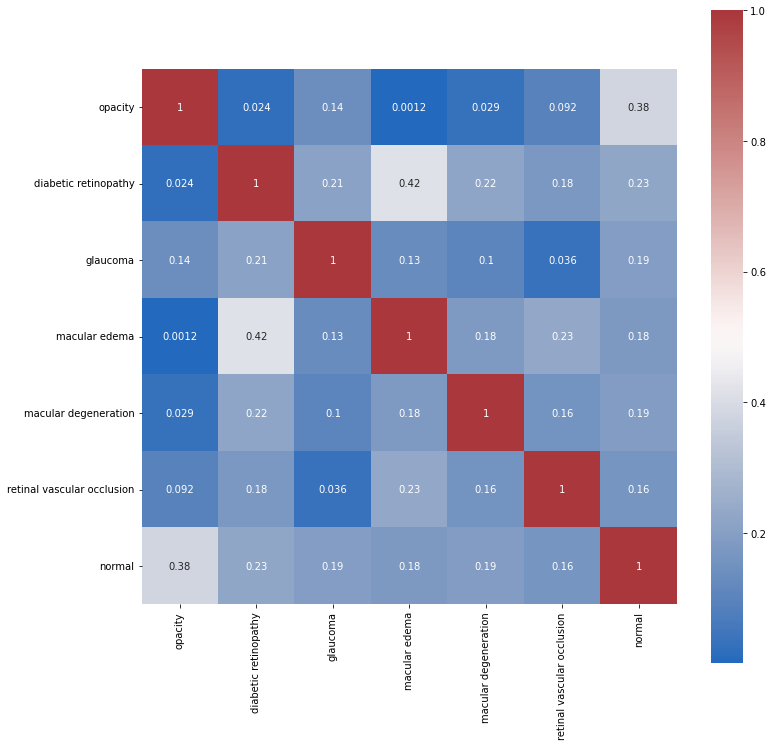

In [48]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df.corr().abs()
sns.heatmap(corr, mask=np.zeros_like(corr), cmap="vlag", annot=True, square=True, ax=ax)

##### From the correlation we can able to understand the probabilty (dependencies) of one disease with another. To elaborate the fact, if the heights of two persons are 6ft and 5ft repectively. Their weight may also vary with the height. The 5ft person's should be less weight than 6ft's. So there is a relation between them. Like how much they are depended on each other defines correlation. 

Reference: https://www.youtube.com/watch?v=6fUYt1alA1U

In [71]:
# Have a look at some images
def imag(tar):
    im_dir = r"D:\Thesis\Dataset\varetinadisease\train\train"
    df_tar = df[df.labels == tar]
    plt.figure(figsize=(10, 10))
    
    for i in range(12):
        plt.subplot(3,4,i+1)
        rand = df_tar.sample(n=1).iloc[0,0]
        img = plt.imread(os.path.join(im_dir, rand))
        plt.axis('off')
        plt.title(rand)
        plt.imshow(img) #, cmap='gray'
    print('Abnormality:'+tar.upper())
    plt.tight_layout()

Abnormality:NORMAL


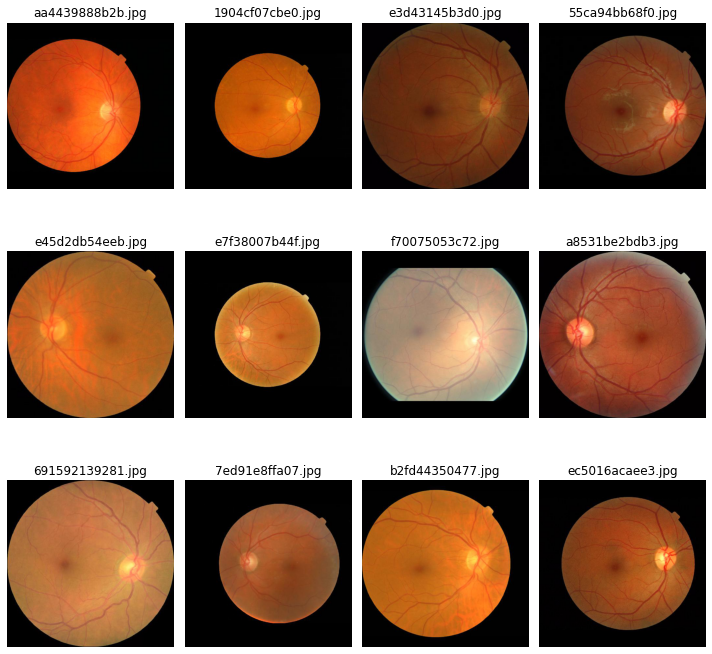

In [80]:
imag('normal')

Abnormality:OPACITY


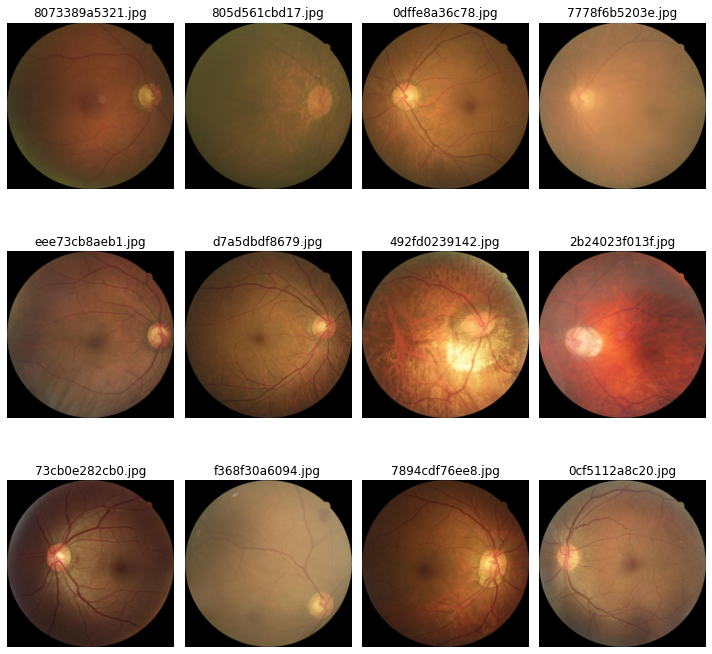

In [75]:
imag('opacity')

Here all the images are not in a best pattern so it has to be cropped and resize

In [82]:
# make a small dataset with only filenames and labels
#df_labels = df[['filename', 'labels']]

In [83]:
# Save datasets to file
#df_labels.to_csv('train_labels.csv', sep=',', encoding='utf-8', index=False)
#df.to_csv('train_new.csv', sep=',', encoding='utf-8', index=False)